# Домашнє завдання №11

# Частина №1. Рекурентна нейронна мережа RNN

In [1]:
import matplotlib.pyplot as plt
from keras.datasets import imdb
from keras.utils import pad_sequences
from keras.models import Sequential
from keras.layers import Embedding, SimpleRNN, Dense, SpatialDropout1D      

### Встановлення гіперпараметрів:

In [2]:
max_features = 10000  # кількість слів, що розглядаються як особливості
maxlen = 500  # обмеження кількості слів в тексті
batch_size = 256
embedding_dim = 32
units = 32

### Завантаження даних:

In [3]:
(input_train, y_train), (input_test, y_test) = imdb.load_data(num_words=max_features)

### Передпроцесинг послідовних даних:

In [4]:
input_train = pad_sequences(input_train, maxlen=maxlen)
input_test = pad_sequences(input_test, maxlen=maxlen)

### Побудова моделі

In [8]:
model = Sequential()
model.add(Embedding(input_dim=max_features, output_dim=embedding_dim))
model.add(SpatialDropout1D(0.2))
model.add(SimpleRNN(units=units, dropout=0.2))
model.add(Dense(1, activation='sigmoid'))


### Компіляція моделі

In [9]:
model.compile(optimizer='rmsprop', loss='binary_crossentropy', metrics=['acc'])


### Навчання моделі

In [10]:
history = model.fit(input_train, y_train, epochs=10, batch_size=batch_size, validation_split=0.3)

Epoch 1/10
69/69 ━━━━━━━━━━━━━━━━━━━━ 8s 104ms/step - acc: 0.5335 - loss: 0.6903 - val_acc: 0.6136 - val_loss: 0.6570
Epoch 2/10
69/69 ━━━━━━━━━━━━━━━━━━━━ 8s 120ms/step - acc: 0.7053 - loss: 0.5876 - val_acc: 0.7783 - val_loss: 0.4887
Epoch 3/10
69/69 ━━━━━━━━━━━━━━━━━━━━ 7s 102ms/step - acc: 0.8036 - loss: 0.4440 - val_acc: 0.8213 - val_loss: 0.4133
Epoch 4/10
69/69 ━━━━━━━━━━━━━━━━━━━━ 8s 115ms/step - acc: 0.8395 - loss: 0.3777 - val_acc: 0.7889 - val_loss: 0.4531
Epoch 5/10
69/69 ━━━━━━━━━━━━━━━━━━━━ 7s 100ms/step - acc: 0.8639 - loss: 0.3335 - val_acc: 0.8551 - val_loss: 0.3509
Epoch 6/10
69/69 ━━━━━━━━━━━━━━━━━━━━ 6s 94ms/step - acc: 0.8869 - loss: 0.2826 - val_acc: 0.8132 - val_loss: 0.4708
Epoch 7/10
69/69 ━━━━━━━━━━━━━━━━━━━━ 7s 97ms/step - acc: 0.9028 - loss: 0.2537 - val_acc: 0.8349 - val_loss: 0.4495
Epoch 8/10
69/69 ━━━━━━━━━━━━━━━━━━━━ 7s 100ms/step - acc: 0.9042 - loss: 0.2388 - val_acc: 0.7913 - val_loss: 0.4722
Epoch 9/10
69/69 ━━━━━━━━━━━━━━━━━━━━ 7s 98ms/step - acc: 

### Візуалізація результатів

In [11]:
def visualisation(history):
    acc = history.history['acc']
    val_acc = history.history['val_acc']
    loss = history.history['loss']
    val_loss = history.history['val_loss']

    epochs = range(1, len(acc) + 1)

    plt.plot(epochs, acc, 'bo', label='Точність на тренуванні')  
    plt.plot(epochs, val_acc, 'b', label='Точність на валідації')  
    plt.title('Точність тренування і валідації')  
    plt.legend()  

    plt.figure()

    plt.plot(epochs, loss, 'bo', label='Втрати на тренуванні')  
    plt.plot(epochs, val_loss, 'b', label='Втрати на валідації')  
    plt.title('Втрати тренування і валідації')  
    plt.legend()  

    plt.show()  


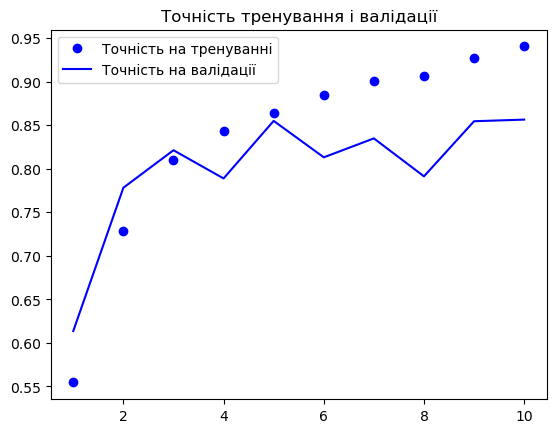

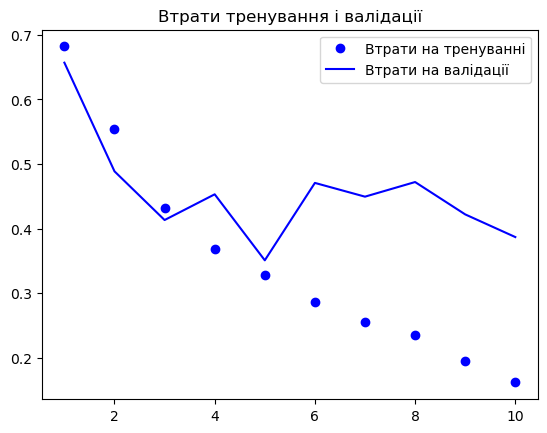

In [12]:
visualisation(history)

### Використання моделі

In [13]:
def prediction(model):
    predictions = model.predict(input_test)

    binary_predictions = [1 if pred > 0.5 else 0 for pred in predictions]

    for i in range(10):
        print(f"Прогнозоване: {binary_predictions[i]}, Фактичне: {y_test[i]}")

    test_loss, test_acc = model.evaluate(input_test, y_test)
    print('Test Loss: {}'.format(test_loss))
    print('Test Accuracy: {}'.format(test_acc))


In [14]:
prediction(model)

782/782 ━━━━━━━━━━━━━━━━━━━━ 6s 8ms/step
Прогнозоване: 0, Фактичне: 0
Прогнозоване: 1, Фактичне: 1
Прогнозоване: 0, Фактичне: 1
Прогнозоване: 0, Фактичне: 0
Прогнозоване: 1, Фактичне: 1
Прогнозоване: 1, Фактичне: 1
Прогнозоване: 1, Фактичне: 1
Прогнозоване: 0, Фактичне: 0
Прогнозоване: 1, Фактичне: 0
Прогнозоване: 1, Фактичне: 1
782/782 ━━━━━━━━━━━━━━━━━━━━ 7s 9ms/step - acc: 0.8492 - loss: 0.3991
Test Loss: 0.4004215598106384
Test Accuracy: 0.8490800261497498


# Частина №2. Побудова моделі LSTM

In [15]:
from keras.layers import LSTM

In [16]:
model2 = Sequential()

model2.add(Embedding(input_dim=max_features, output_dim=embedding_dim, input_length=maxlen))
model2.add(SpatialDropout1D(0.2))
model2.add(LSTM(units=units, dropout=0.2, recurrent_dropout=0.2))
model2.add(Dense(1, activation='sigmoid'))


### Компіляція і тренування моделі

In [17]:
model2.compile(optimizer='rmsprop', loss='binary_crossentropy', metrics=['acc'])

model2.summary()

Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ embedding_2 (Embedding)         │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ spatial_dropout1d_2             │ ?                      │             0 │
│ (SpatialDropout1D)              │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm (LSTM)                     │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ ?                      │   0 (unbuilt) │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 0 (0.00 B)

 Trainable params: 0 (0.00 B)

 Non-trainable params: 0 (0.00 B)

In [18]:
import tensorflow as tf
import keras
print("TensorFlow version:", tf.__version__)
print("Keras version:", keras.__version__)


TensorFlow version: 2.16.1
Keras version: 3.2.1


In [ ]:
history2 = model2.fit(input_train, y_train, epochs=10, batch_size=batch_size, validation_split=0.3)

visualisation(history2)

### Прогнозування з використанням навченої моделі

In [ ]:
prediction(model2)

# Частина №3. Побудова моделі BRNN

In [ ]:
from keras.layers import Bidirectional

In [ ]:
model3 = Sequential()

model3.add(Embedding(input_dim=max_features, output_dim=embedding_dim, input_length=maxlen))
model3.add(SpatialDropout1D(0.2))
model3.add(Bidirectional(LSTM(32, dropout=0.2)))
model3.add(Dense(1, activation='sigmoid'))


### Компіляція і тренування моделі

In [ ]:
model3.compile(optimizer='rmsprop', loss='binary_crossentropy', metrics=['acc'])

model3.summary()

In [ ]:
history3 = model3.fit(input_train, y_train, epochs=10, batch_size=batch_size, validation_split=0.3)

visualisation(history3)

### Прогнозування з використанням навченої моделі

In [ ]:
prediction(model3)

# Частина №4. Побудова моделі DRNN

In [ ]:
model4 = Sequential()

model4.add(Embedding(input_dim=max_features, output_dim=embedding_dim, input_length=maxlen))
model4.add(SpatialDropout1D(0.2))

model4.add(Bidirectional(LSTM(32, dropout=0.2, return_sequences=True)))
model4.add(Bidirectional(LSTM(32, dropout=0.2)))

model4.add(Dense(1, activation='sigmoid'))


### Компіляція і тренування моделі

In [ ]:
model4.compile(optimizer='rmsprop', loss='binary_crossentropy', metrics=['acc'])

model4.summary()

In [ ]:
history4 = model4.fit(input_train, y_train, epochs=10, batch_size=batch_size, validation_split=0.3)

visualisation(history4)

### Прогнозування з використанням навченої моделі

In [ ]:
prediction(model4)

In [ ]:
epochs = range(1, len(history.history['acc']) + 1)
epochs2 = range(1, len(history2.history['acc']) + 1)
epochs3 = range(1, len(history3.history['acc']) + 1)
epochs4 = range(1, len(history4.history['acc']) + 1)

# Створення сітки графіків 2x2
plt.figure(figsize=(12, 8))

# Графік 1: Точність на тренувальних данних
plt.subplot(2, 2, 1)
plt.plot(epochs, history.history['acc'], label='Model RNN')
plt.plot(epochs2, history2.history['acc'], label='Model LSTM')
plt.plot(epochs3, history3.history['acc'], label='Model BRNN')
plt.plot(epochs4, history4.history['acc'], label='Model DRNN')

plt.title('Training Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()

# Графік 2: Точність на валідаційних данних
plt.subplot(2, 2, 2)
plt.plot(epochs, history.history['val_acc'], label='Model RNN')
plt.plot(epochs2, history2.history['val_acc'], label='Model LSTM')
plt.plot(epochs3, history3.history['val_acc'], label='Model BRNN')
plt.plot(epochs4, history4.history['val_acc'], label='Model DRNN')

plt.title('Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()

# Графік 3: Втрати на тренувальних данних
plt.subplot(2, 2, 3)
plt.plot(epochs, history.history['loss'], label='Model RNN')
plt.plot(epochs2, history2.history['loss'], label='Model LSTM')
plt.plot(epochs3, history3.history['loss'], label='Model BRNN')
plt.plot(epochs4, history4.history['loss'], label='Model DRNN')

plt.title('Training Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()

# Графік 4: Втрати на валідаційних данних
plt.subplot(2, 2, 4)
plt.plot(epochs, history.history['val_loss'], label='Model RNN')
plt.plot(epochs2, history2.history['val_loss'], label='Model LSTM')
plt.plot(epochs3, history3.history['val_loss'], label='Model BRNN')
plt.plot(epochs4, history4.history['val_loss'], label='Model DRNN')

plt.title('Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()

plt.tight_layout()
plt.show()
